In [1]:
from astropy.io import fits
import astropy.constants as c
import astropy.units as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import os
from scipy.signal import find_peaks

/Users/dennisraush/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import importlib
import util
importlib.reload(util) # run this each time util is changed, to prevent restarting kernel

<module 'util' from '/Users/dennisraush/Desktop/caltech/senior/spring/Ay-Ge 107/ay107_observation/util.py'>

## Load data

In [3]:
dirname = '20240504'

In [4]:
fpaths = glob.glob(f'{dirname}/*.fits')
print(fpaths)

['20240504/red0018.fits', '20240504/blue0016.fits', '20240504/red0022.fits', '20240504/red0002.fits', '20240504/red0014.fits', '20240504/blue0020.fits', '20240504/blue0021.fits', '20240504/red0015.fits', '20240504/red0003.fits', '20240504/red0023.fits', '20240504/blue0017.fits', '20240504/red0019.fits', '20240504/blue0001.fits', '20240504/red0004.fits', '20240504/red0012.fits', '20240504/blue0026.fits', '20240504/blue0006.fits', '20240504/red0008.fits', '20240504/blue0010.fits', '20240504/red0024.fits', '20240504/red0025.fits', '20240504/blue0011.fits', '20240504/red0009.fits', '20240504/blue0007.fits', '20240504/blue0027.fits', '20240504/red0013.fits', '20240504/red0005.fits', '20240504/blue0024.fits', '20240504/red0010.fits', '20240504/red0006.fits', '20240504/blue0008.fits', '20240504/red0026.fits', '20240504/blue0028.fits', '20240504/blue0012.fits', '20240504/blue0004.fits', '20240504/blue0005.fits', '20240504/blue0013.fits', '20240504/red0027.fits', '20240504/blue0009.fits', '2024

In [5]:
with fits.open('20240504/red0018.fits') as hdul:
    hdul_r18 = hdul
hdul_r18[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4141 / length of data axis 1                          
NAXIS2  =                  440 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBJECT  = 'none    '        

In [6]:
with fits.open('20240504/blue0018.fits') as hdul:
    hdul_b18 = hdul
hdul_b18[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  460 / length of data axis 1                          
NAXIS2  =                 2835 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBJECT  = 'none    '        

In [7]:
hdr_keys = ['OBJECT', 'IMGTYPE', 'GAIN', 'EXPTIME', 'UT', 'RA', 'DEC', 'AIRMASS', 'GRATING']

In [8]:
hdr_data = []
data = {}
for fpath in fpaths:
    with fits.open(fpath) as hdul:
        k = re.split(r'/|\.', fpath)[1]
        hdr = hdul[0].header
        hdr_data.append([hdr.get(k, None)  for k in hdr_keys])
        data[k] = hdul[0].data.astype(float)

In [9]:
len(data)

55

In [10]:
hdr_df = pd.DataFrame(hdr_data, columns=hdr_keys, index=[re.split(r'/|\.', fpath)[1] for fpath in fpaths])
hdr_df.index.name = 'filename'
hdr_df.sort_index()

OBJECT IMGTYPE  GAIN  EXPTIME          UT           RA  \
filename                                                              
blue0001               bias  0.72      0.0  23:16:52.6  06:17:13.70   
blue0002               bias  0.72      0.0  23:17:14.3  06:17:35.45   
blue0003               bias  0.72      0.0  23:17:35.9  06:17:57.11   
blue0004               bias  0.72      0.0  23:17:57.6  06:18:18.89   
blue0005               bias  0.72      0.0  23:18:19.3  06:18:40.64   
blue0006               bias  0.72      0.0  23:18:41.0  06:19:02.40   
blue0007               bias  0.72      0.0  23:19:02.7  06:19:24.16   
blue0008               bias  0.72      0.0  23:19:24.3  06:19:45.80   
blue0009               bias  0.72      0.0  23:19:46.0  06:20:07.57   
blue0010               bias  0.72      0.0  23:20:07.7  06:20:29.33   
blue0011               bias  0.72      0.0  23:20:29.4  06:20:51.08   
blue0012      fe-ar     cal  0.72     30.0  23:28:13.4  06:28:36.39   
blue0013      fe-ar     cal  0.72     30.0  23:29:05.1  06:29:28.24   
blue0014      fe-ar     cal  0.72     30.0  23:29:56.7  06:30:19.97   
blue0015      fe-ar     cal  0.72     30.0  23:30:48.4  06:31:11.83   
blue0016      fe-ar     cal  0.72     30.0  23:31:40.1  06:32:03.67   
blue0017       none    flat  0.72     80.0  23:36:37.1  06:37:01.52   
blue0018       none    flat  0.72     80.0  23:39:19.9  06:39:44.78   
blue0019       none    flat  0.72     80.0  23:41:01.6  06:41:26.79   
blue0020       none    flat  0.72     80.0  23:42:43.2  06:43:08.68   
blue0021       none    flat  0.72     80.0  23:44:24.9  06:44:50.67   
blue0022  SN2024eze  object  0.72   1200.0  03:50:23.6  16:59:05.82   
blue0023  SN2024eze  object  0.72   1200.0  04:10:54.6  16:59:05.86   
blue0024  HD 158261  object  0.72     10.0  04:37:28.9  17:26:44.66   
blue0025  HD 158261  object  0.72      5.0  04:38:50.2  17:26:44.73   
blue0026  HD 158261  object  0.72      1.0  04:40:41.6  17:26:44.71   
blue0027  HD 158261  object  0.72      0.5  04:44:02.0  17:26:44.70   
blue0028  HD 158261  object  0.72      0.5  04:44:24.2  17:26:44.68   
red0001                bias  2.80      0.0  23:16:56.4  06:17:17.50   
red0002                bias  2.80      0.0  23:17:19.5  06:17:40.67   
red0003                bias  2.80      0.0  23:17:42.7  06:18:03.94   
red0004                bias  2.80      0.0  23:18:05.8  06:18:27.10   
red0005                bias  2.80      0.0  23:18:29.0  06:18:50.36   
red0006                bias  2.80      0.0  23:18:52.1  06:19:13.54   
red0007                bias  2.80      0.0  23:19:15.3  06:19:36.79   
red0008                bias  2.80      0.0  23:19:38.4  06:19:59.95   
red0009                bias  2.80      0.0  23:20:01.6  06:20:23.22   
red0010                bias  2.80      0.0  23:20:24.7  06:20:46.38   
red0011                bias  2.80      0.0  23:20:47.8  06:21:09.55   
red0012   he  ne ar     cal  2.80      0.5  23:23:59.6  06:24:21.87   
red0013   he  ne ar     cal  2.80      0.5  23:24:23.3  06:24:45.64   
red0014   he  ne ar     cal  2.80      0.5  23:24:46.9  06:25:09.31   
red0015   he  ne ar     cal  2.80      0.5  23:25:10.6  06:25:33.09   
red0016   he  ne ar     cal  2.80      0.5  23:25:34.2  06:25:56.73   
red0017        none    flat  2.80     50.0  23:37:52.5  06:38:17.14   
red0018        none    flat  2.80     50.0  23:40:04.3  06:40:29.32   
red0019        none    flat  2.80     50.0  23:41:17.5  06:41:42.73   
red0020        none    flat  2.80     50.0  23:42:30.6  06:42:56.05   
red0021        none    flat  2.80     50.0  23:43:43.8  06:44:09.46   
red0022        none  object  2.80    600.0  03:49:20.9  16:59:05.87   
red0023   SN2024eze  object  2.80    600.0  04:01:01.1  16:59:05.80   
red0024   SN2024eze  object  2.80    600.0  04:11:24.3  16:59:05.90   
red0025   SN2024eze  object  2.80    600.0  04:21:47.4  16:59:05.93   
red0026   HD 158261  object  2.80      3.0  04:39:22.2  17:26:44.73   
red0027   HD 158261  object  2.80    

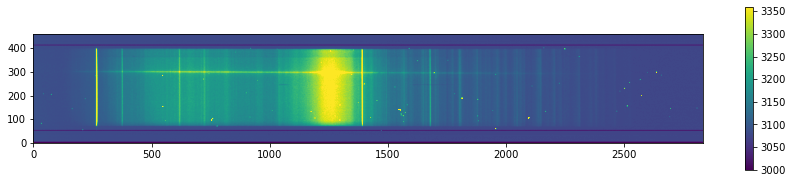

In [11]:
plt.figure(figsize=(15,3))
plt.imshow(data['blue0023'].T, origin='lower', clim=np.percentile(data['blue0023'].T, (1,99)))
plt.colorbar()

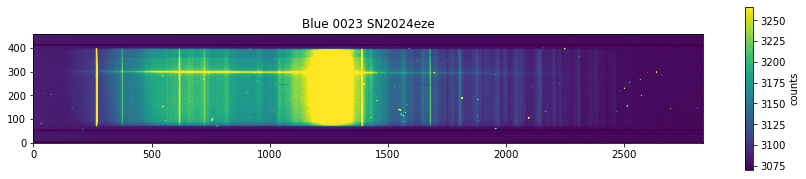

In [12]:
util.plot_frame(data['blue0023'].T, label='counts', title='Blue 0023 SN2024eze', prange=(5,95))

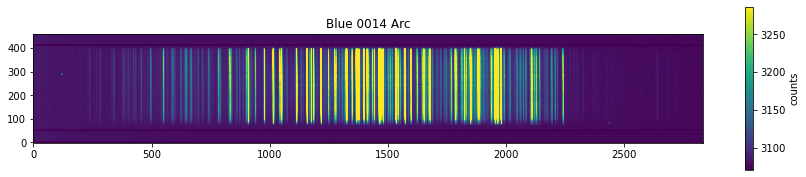

In [13]:
util.plot_frame(data['blue0014'].T, label='counts', title='Blue 0014 Arc', prange=(5,95))

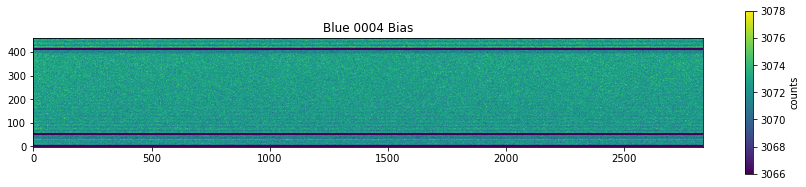

In [14]:
util.plot_frame(data['blue0004'].T, label='counts', title='Blue 0004 Bias', prange=(5,95))

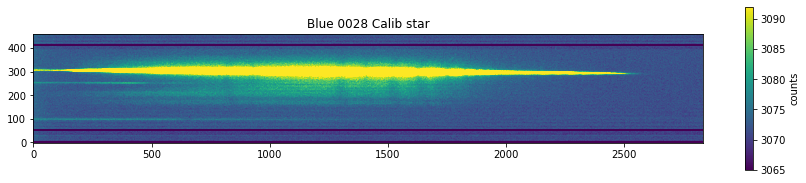

In [15]:
util.plot_frame(data['blue0028'].T, label='counts', title='Blue 0028 Calib star', prange=(5,95))

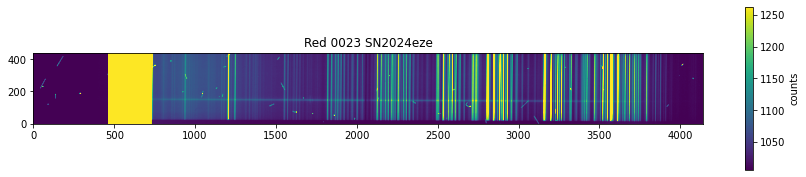

In [16]:
util.plot_frame(data['red0023'], label='counts', title='Red 0023 SN2024eze', prange=(10, 90))

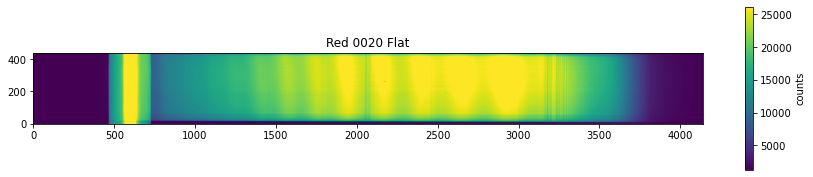

In [17]:
util.plot_frame(data['red0020'], label='counts', title='Red 0020 Flat', prange=(10, 90))

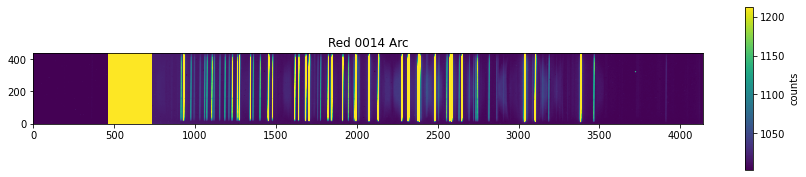

In [18]:
util.plot_frame(data['red0014'], label='counts', title='Red 0014 Arc', prange=(10, 90))

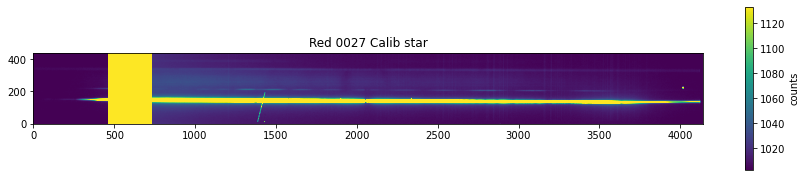

In [19]:
util.plot_frame(data['red0027'], label='counts', title='Red 0027 Calib star', prange=(10, 90))

## Prepare master frames
- for flat, bias, arc (denoted as cal in IMGTYPE), calib star

In [20]:
red_shape = data['red0001'].shape
blue_shape = data['blue0001'].shape

red_shape,blue_shape

((440, 4141), (2835, 460))

In [21]:
bias = hdr_df[hdr_df['IMGTYPE'] == 'bias']
flats = hdr_df[hdr_df['IMGTYPE'] == 'flat']
arcs = hdr_df[hdr_df['IMGTYPE'] == 'cal']
calib_star = hdr_df[(hdr_df['IMGTYPE'] == 'object') & (hdr_df['OBJECT'] == 'HD 158261')]

In [22]:
#remove saturated frames for blue calib star
calib_star.drop(calib_star.loc[(calib_star.index.str.contains('blue')) & (calib_star['EXPTIME'] > 0.5)].index, inplace=True)
calib_star

/var/folders/yx/0g48k4cd68s3hl5thym8v0br0000gn/T/ipykernel_43657/4270216898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calib_star.drop(calib_star.loc[(calib_star.index.str.contains('blue')) & (calib_star['EXPTIME'] > 0.5)].index, inplace=True)


OBJECT IMGTYPE  GAIN  EXPTIME          UT           RA  \
filename                                                              
blue0027  HD 158261  object  0.72      0.5  04:44:02.0  17:26:44.70   
red0026   HD 158261  object  2.80      3.0  04:39:22.2  17:26:44.73   
blue0028  HD 158261  object  0.72      0.5  04:44:24.2  17:26:44.68   
red0027   HD 158261  object  2.80      3.0  04:39:48.3  17:26:44.69   

                  DEC AIRMASS   GRATING  
filename                                 
blue0027  +34:41:49.3   2.685  600/4000  
red0026   +34:41:49.1   2.789  316/7500  
blue0028  +34:41:49.5   2.677  600/4000  
red0027   +34:41:49.3   2.779  316/7500

### Master bias (red)

In [23]:
def create_master(frame, color, bias=None):
    frame_filtered = frame[np.char.startswith(list(frame.index), color)]
    shape = red_shape if color=='red' else blue_shape
    layers = np.zeros((shape[0], shape[1], frame_filtered.shape[0]))
    for i, curr_file in enumerate(frame_filtered.index):
        curr_data = data[curr_file]
        if bias is not None:
            texp = frame_filtered.loc[curr_file, 'EXPTIME']
            curr_data = (curr_data - bias) / texp
        layers[:, :, i] = curr_data

    master = np.median(layers, axis=2)
    return master


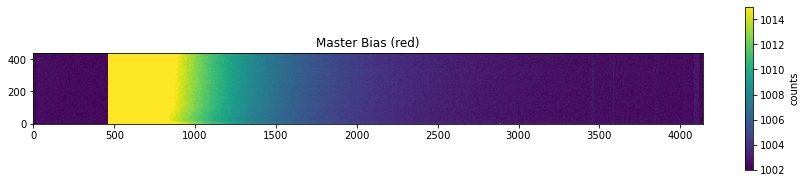

In [24]:
master_bias_red = create_master(bias, 'red')
util.plot_frame(master_bias_red, label='counts', title='Master Bias (red)', prange=(10, 90))

### Master bias (blue)

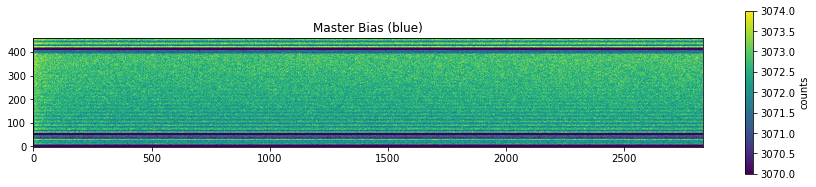

In [25]:
master_bias_blue = create_master(bias, 'blue')
util.plot_frame(master_bias_blue.T, label='counts', title='Master Bias (blue)', prange=(10, 90))

### Master flat (red)

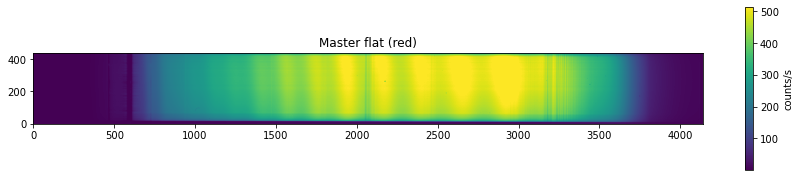

In [26]:
master_flat_red = create_master(flats, 'red', master_bias_red)
util.plot_frame(master_flat_red, label='counts/s', title='Master flat (red)', prange=(5, 95))

### Master flat (blue)

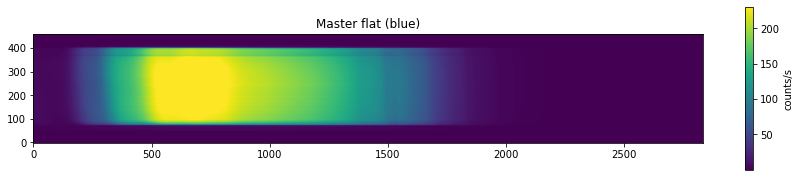

In [27]:
master_flat_blue= create_master(flats, 'blue', master_bias_blue)
util.plot_frame(master_flat_blue.T, label='counts/s', title='Master flat (blue)', prange=(5, 95))

### Master arc (red)

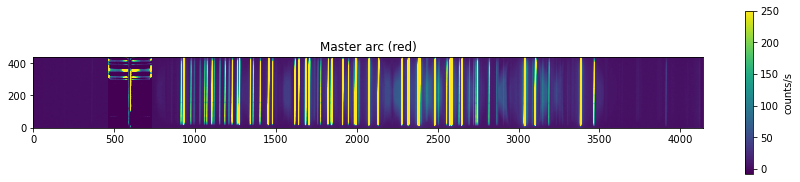

In [28]:
master_arc_red = create_master(arcs, 'red', master_bias_red)
util.plot_frame(master_arc_red, label='counts/s', title='Master arc (red)', prange=(5, 95))

### Master arc (blue)

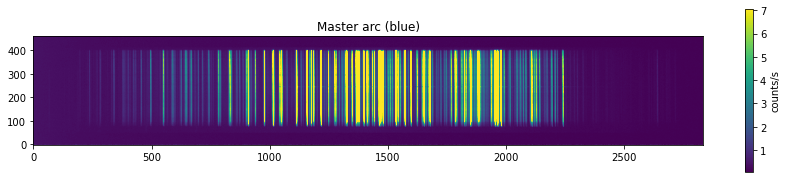

In [29]:
master_arc_blue = create_master(arcs, 'blue', master_bias_blue)
util.plot_frame(master_arc_blue.T, label='counts/s', title='Master arc (blue)', prange=(5, 95))

## Rectify frames

### Rectify blue
#### Find trace using calib star

In [30]:
master_calib_star_blue = create_master(calib_star, 'blue', master_bias_blue).T

(250.0, 350.0)

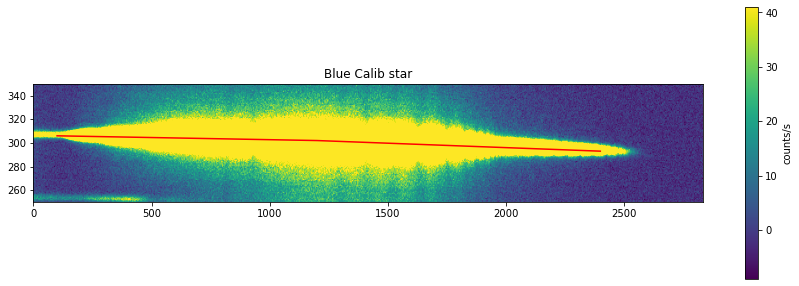

In [31]:
x_edges_B = [100, 1200, 2400] #0 is dead
y_edges_B = [np.argmax(master_calib_star_blue[:,i]) for i in x_edges_B]

prange_B = (5,95)
util.plot_frame(master_calib_star_blue, figsize=(15, 5), aspect=5, label='counts/s', title='Blue Calib star', prange=prange_B)
plt.plot(x_edges_B, y_edges_B, label='trace', color='r')
plt.ylim(250, 350)

In [32]:
trace_x_B = np.arange(0, master_calib_star_blue.shape[1], 1) # x indices remain same
# fit a polynomial using x,y edges_B and evaluate entire trace
trace_y_B = np.round(np.polyval(np.polyfit(x_edges_B, y_edges_B, 1), trace_x_B)).astype(int) #y indices has to be integers
trace_x_B.shape, trace_y_B.shape

((2835,), (2835,))

(250.0, 350.0)

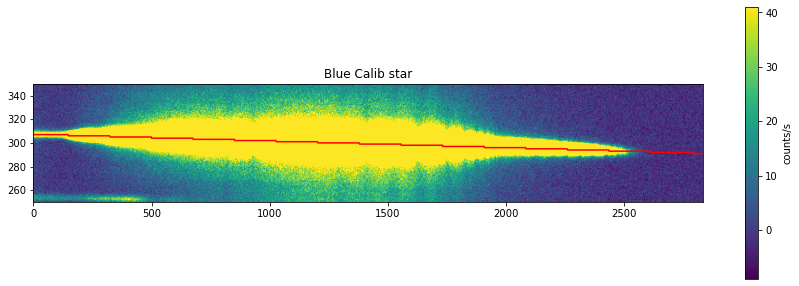

In [33]:
util.plot_frame(master_calib_star_blue, figsize=(15, 5), aspect=5, label='counts/s', title='Blue Calib star', prange=prange_B)
plt.plot(trace_x_B, trace_y_B, label='trace', color='r')
plt.ylim(250, 350)

#### Find y pixel bounds using flat

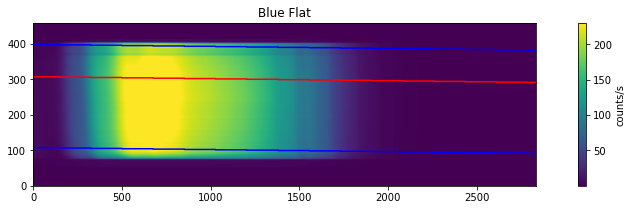

In [34]:
util.plot_frame(master_flat_blue.T, aspect=2, label='counts/s', title='Blue Flat', prange=prange_B)
plt.plot(trace_x_B, trace_y_B, color='r')

y_bound_upper_B, y_bound_lower_B = (91, 200)
plt.plot(trace_x_B, trace_y_B+y_bound_upper_B, color='b')
plt.plot(trace_x_B, trace_y_B-y_bound_lower_B, color='b')

In [35]:
master_flat_blue.T.shape

(460, 2835)

In [36]:
# 1. Transpose array [where needed]
# 2. Pick values column wise within the y bounds
rectified_flat_B, rectified_calib_B, rectified_bias_B, rectified_arc_B  = [
    util.rectify_frame(frame, trace_y_B, y_bound_upper_B, y_bound_lower_B) for frame in
    [master_flat_blue.T, master_calib_star_blue, master_bias_blue.T, master_arc_blue.T]]
rectified_flat_B.shape

(292, 2835)

#### Find X-trim bounds
Only bright area of flat has meaningful data (division by normalised flat suffers if x isn't trimmed)

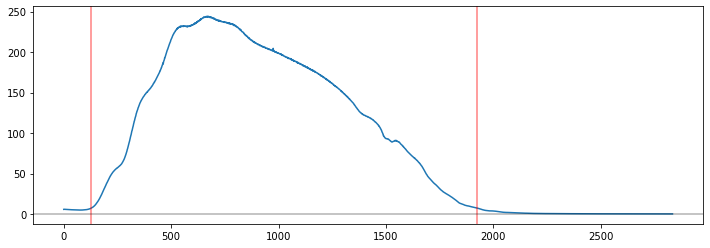

In [37]:
flat1D_B = np.median(rectified_flat_B, axis=0)
x_trim_mask_B = np.where((flat1D_B >= np.max(flat1D_B) * 0.03))[0] # selecting 0.03 based on 1D flat

plt.figure(figsize=(12,4))
plt.plot(flat1D_B)
plt.axvline(x_trim_mask_B[0], color='r', alpha=0.5)
plt.axvline(x_trim_mask_B[-1], color='r', alpha=0.5)
plt.axhline(0, color='black', alpha=0.3)

In [38]:
# 3. pick values within x-bounds
# 4. flip along X-axis (because blue has inverted wavelength axis)
rectified_flat_B, rectified_calib_B, rectified_bias_B, rectified_arc_B  = [
    frame[:, x_trim_mask_B][:,::-1] for frame in
    [rectified_flat_B, rectified_calib_B, rectified_bias_B, rectified_arc_B]]
rectified_flat_B.shape

(292, 1796)

#### Rectified blue frames plots

In [39]:
trace_y_idx_B = y_bound_lower_B

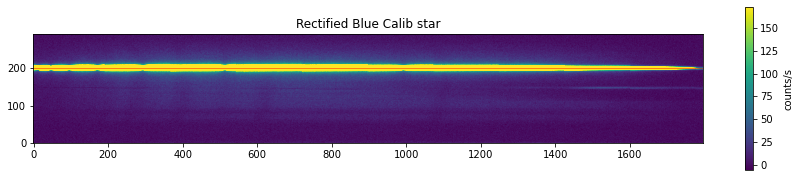

In [40]:
util.plot_frame(rectified_calib_B, label='counts/s', title='Rectified Blue Calib star', prange=prange_B)
plt.axhline(trace_y_idx_B, color='r', alpha=0.9, linewidth=0.5)

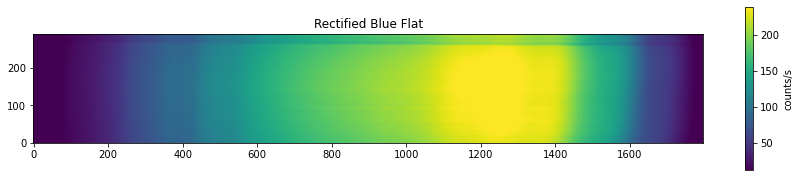

In [41]:
util.plot_frame(rectified_flat_B, label='counts/s', title='Rectified Blue Flat', prange=prange_B)

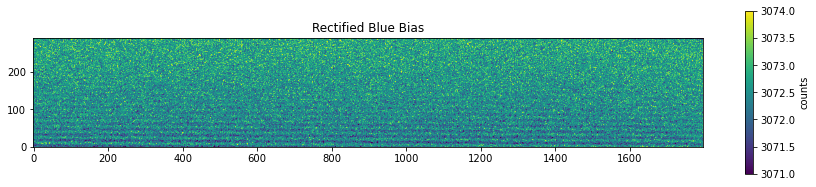

In [42]:
util.plot_frame(rectified_bias_B, label='counts', title='Rectified Blue Bias', prange=prange_B)


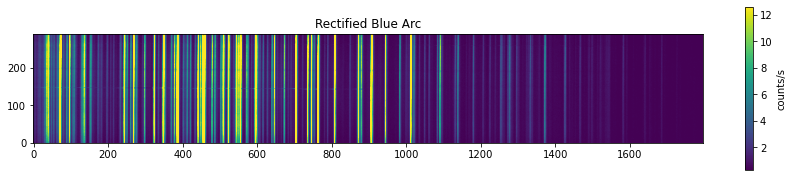

In [43]:
util.plot_frame(rectified_arc_B, label='counts/s', title='Rectified Blue Arc', prange=prange_B)

### Rectify Red
#### Find trace

In [44]:
master_calib_star_red = create_master(calib_star, 'red', master_bias_red)

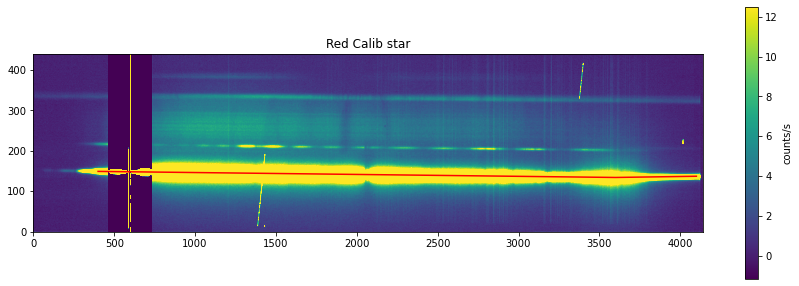

In [45]:
x_edges_R = [400, 3600, 4100]
y_edges_R = [np.argmax(master_calib_star_red[:,i]) for i in x_edges_R]

prange_R = (7,93)
util.plot_frame(master_calib_star_red, figsize=(15, 5), aspect=2.5, label='counts/s', title='Red Calib star', prange=prange_R)
plt.plot(x_edges_R, y_edges_R, label='trace', color='r')


In [46]:
trace_x_R = np.arange(0, master_calib_star_red.shape[1], 1) # x indices remain same
trace_y_R = np.round(np.polyval(np.polyfit(x_edges_R, y_edges_R, 1), trace_x_R)).astype(int) #y indices has to be integers
trace_x_R.shape, trace_y_R.shape

((4141,), (4141,))

#### Find y pixel bounds

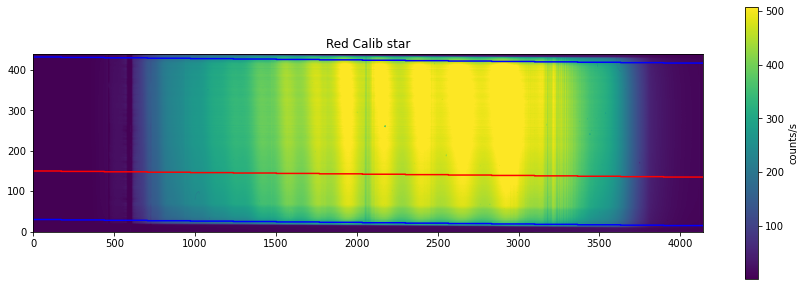

In [47]:
util.plot_frame(master_flat_red, figsize=(15, 5), aspect=2.5, label='counts/s', title='Red Calib star', prange=prange_R)
plt.plot(trace_x_R, trace_y_R, color='r')

y_bound_upper_R, y_bound_lower_R = (282, 120)
plt.plot(trace_x_R, trace_y_R+y_bound_upper_R, color='b')
plt.plot(trace_x_R, trace_y_R-y_bound_lower_R, color='b')

In [48]:
master_flat_red.shape

(440, 4141)

In [49]:
# 1. Pick values column wise within the y bounds
rectified_flat_R, rectified_calib_R, rectified_bias_R, rectified_arc_R  = [
    util.rectify_frame(frame, trace_y_R, y_bound_upper_R, y_bound_lower_R) for frame in
    [master_flat_red, master_calib_star_red, master_bias_red, master_arc_red]]
rectified_flat_R.shape

(403, 4141)

#### Find X-trim bounds
Need to remove dead area of detector and include only bright area of flat has meaningful data (division by normalised flat suffers if x isn't trimmed)

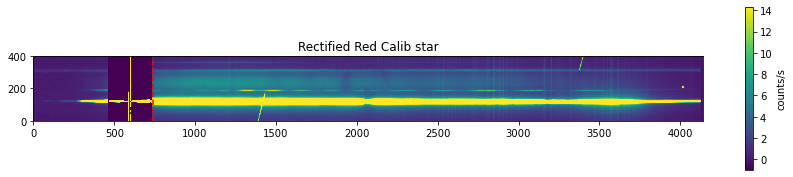

In [50]:
util.plot_frame(rectified_calib_R, label='counts/s', title='Rectified Red Calib star', prange=prange_R)
plt.axvline(740, color='r', linestyle='--') # need to discard the bad section too

In [51]:
np.median(rectified_calib_R, axis=0)[720: 750]

array([-6.96666667e+01, -7.33333333e+01, -7.81666667e+01, -7.91666667e+01,
       -7.98333333e+01, -9.16666667e+01, -1.35333333e+02, -3.46000000e+02,
       -9.42166667e+02, -1.25716667e+03, -5.10000000e+01, -1.16666667e+00,
        2.33333333e+00,  4.16666667e+00,  4.00000000e+00,  3.83333333e+00,
        3.66666667e+00,  3.50000000e+00,  3.50000000e+00,  3.33333333e+00,
        3.66666667e+00,  3.33333333e+00,  3.50000000e+00,  3.50000000e+00,
        3.33333333e+00,  3.66666667e+00,  3.33333333e+00,  3.50000000e+00,
        3.33333333e+00,  3.33333333e+00])

In [52]:
np.median(rectified_calib_R, axis=0)[731:733]

array([-1.16666667,  2.33333333])

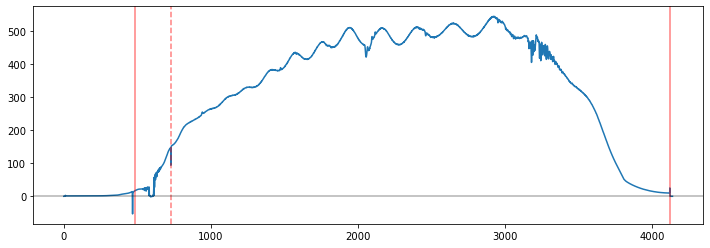

In [53]:
flat1D_R = np.median(rectified_flat_R, axis=0)

x_trim_mask_R = np.where((flat1D_R >= np.max(flat1D_R) * 0.03))[0]

plt.figure(figsize=(12,4))
plt.plot(flat1D_R)
plt.axvline(x_trim_mask_R[0], color='r', alpha=0.5)
plt.axvline(x_trim_mask_R[-1], color='r', alpha=0.5)
plt.axvline(732, color='r', linestyle='--', alpha=0.5) # the bad section
plt.axhline(0, color='black', alpha=0.3)

In [54]:
x_trim_mask_R = x_trim_mask_R[x_trim_mask_R>=732]
x_trim_mask_R

array([ 732,  733,  734, ..., 3987, 3988, 4122])

In [55]:
rectified_flat_R

array([[ 0.08,  0.06,  0.06, ...,  0.06,  0.02,  0.02],
       [ 0.02,  0.  ,  0.08, ...,  0.04,  0.  , -0.02],
       [ 0.08,  0.06,  0.04, ...,  0.04,  0.02,  0.  ],
       ...,
       [ 0.16,  0.2 ,  0.08, ...,  0.2 ,  0.16,  0.12],
       [ 0.1 ,  0.12,  0.16, ...,  0.08,  0.2 ,  0.22],
       [ 0.12,  0.14,  0.1 , ...,  0.12,  0.2 ,  0.24]])

In [56]:
# 2. pick values within x-bounds
rectified_flat_R, rectified_calib_R, rectified_bias_R, rectified_arc_R  = [
    frame[:, x_trim_mask_R] for frame in
    [rectified_flat_R, rectified_calib_R, rectified_bias_R, rectified_arc_R]]
rectified_flat_R.shape

(403, 3258)

#### Rectifed Red frames plots

In [57]:
trace_y_idx_R = y_bound_lower_R

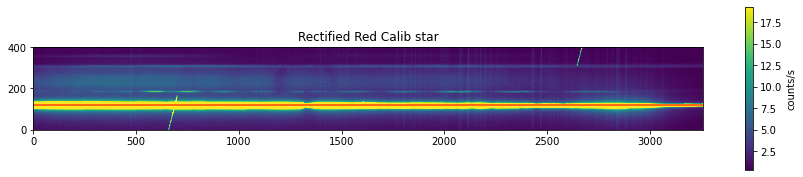

In [58]:
util.plot_frame(rectified_calib_R, label='counts/s', title='Rectified Red Calib star', prange=prange_R)
plt.axhline(trace_y_idx_R, color='r', alpha=0.7)

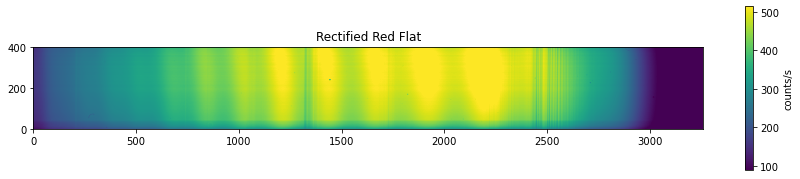

In [59]:
util.plot_frame(rectified_flat_R, label='counts/s', title='Rectified Red Flat', prange=prange_R)

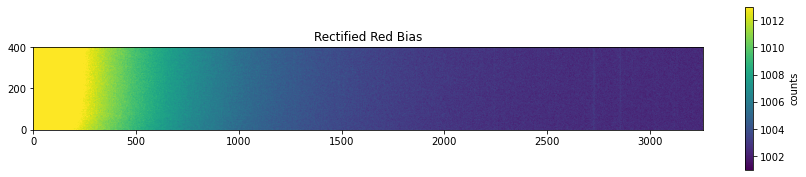

In [60]:
util.plot_frame(rectified_bias_R, label='counts', title='Rectified Red Bias', prange=prange_R)

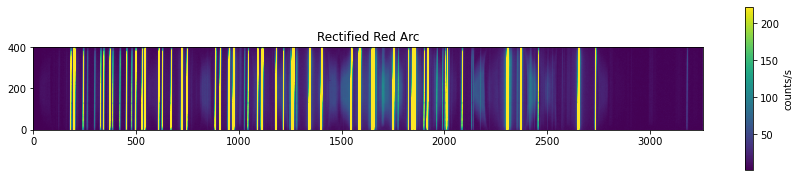

In [61]:
util.plot_frame(rectified_arc_R, label='counts/s', title='Rectified Red Arc', prange=prange_R)

## Reduce frames 
- subtract bias, divide by exptime - already done by create_master()
- divide by normalised flat

In [62]:
rectified_flat_B.shape, rectified_flat_R.shape

((292, 1796), (403, 3258))

### Red

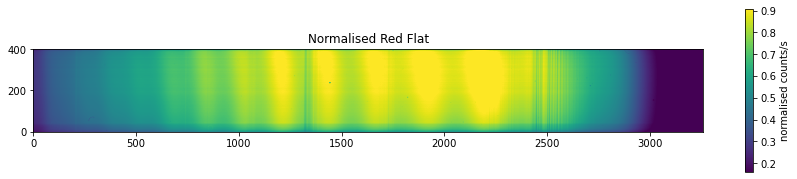

In [63]:
normalised_flat_R = rectified_flat_R / np.max(rectified_flat_R)
util.plot_frame(normalised_flat_R, label='normalised counts/s', title='Normalised Red Flat', prange=prange_R)

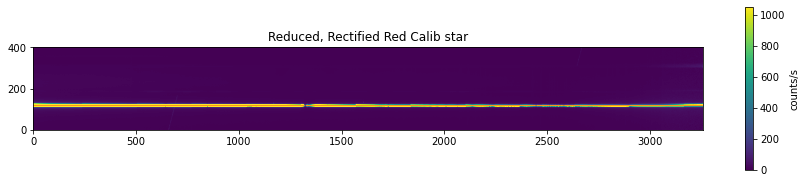

In [64]:
reduced_rect_calib_R = rectified_calib_R / normalised_flat_R

util.plot_frame(reduced_rect_calib_R, label='counts/s', title='Reduced, Rectified Red Calib star', prange=(2,98))
plt.axhline(trace_y_idx_R, color='r', alpha=0.7, linewidth=0.5)

### Blue

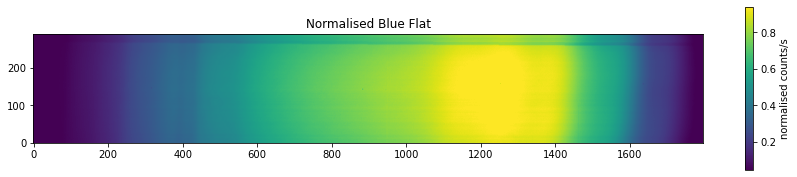

In [65]:
normalised_flat_B = rectified_flat_B / np.max(rectified_flat_B)
util.plot_frame(normalised_flat_B, label='normalised counts/s', title='Normalised Blue Flat', prange=prange_B)

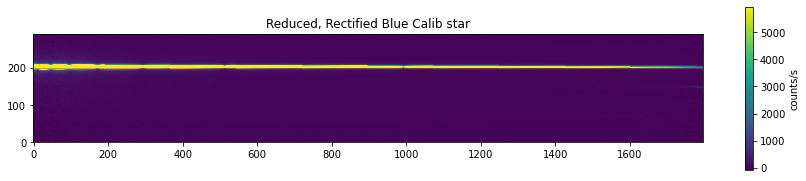

In [66]:
reduced_rect_calib_B = rectified_calib_B / normalised_flat_B

util.plot_frame(reduced_rect_calib_B, label='counts/s', title='Reduced, Rectified Blue Calib star', prange=(2, 98))
plt.axhline(trace_y_idx_B, color='r', alpha=0.7, linewidth=0.5)

## Wavelength calibration
- use arc to derive a px to wvl solution

### Blue

In [67]:
arc_aperture_B = (rectified_calib_B.shape[0]-1 - trace_y_idx_B)
arc_aperture_B

91

In [68]:
# take median and flip along x-axis
arc_1D_spectrum_B = np.median(rectified_arc_B[trace_y_idx_B - arc_aperture_B : trace_y_idx_B + arc_aperture_B + 1], axis=0)
rectified_arc_B.shape, arc_1D_spectrum_B.shape

((292, 1796), (1796,))

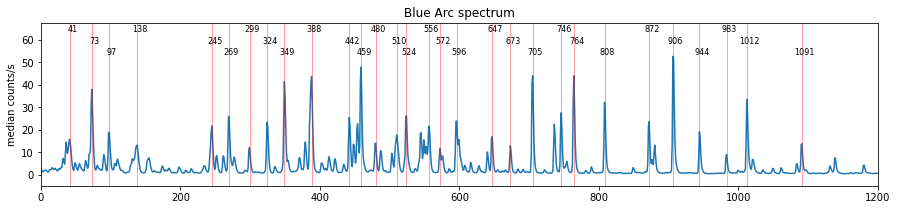

In [69]:
plt.figure(figsize=(15, 3))
plt.plot(arc_1D_spectrum_B)
plt.ylabel('median counts/s')
plt.title('Blue Arc spectrum')
plt.xlim(0, 1200)
plt.ylim(-5, np.max(arc_1D_spectrum_B)+15) # to allow space for annotations

peaks_x_B, _ = find_peaks(arc_1D_spectrum_B, height=8, distance=12)

for i, px in enumerate(peaks_x_B):
    plt.axvline(px, color='r', alpha=0.75, linewidth=0.5)
    plt.text(px+4, np.max(arc_1D_spectrum_B)+12-(5*(i%3)), f'{px}', fontsize=8, ha='center', va='center')

In [70]:
# Identified peaks from figure 10c, 10b (page 29-30 in https://sites.astro.caltech.edu/palomar/observer/200inchResources/dbsp/dbspArcAtlas.pdf)
# peaks_wvl_B = {
#     1816: (4764.865, 'Ar'), # tallest in 10c
#     # L to R to tallest ----
#     1854: (4806.021, 'Ar'),
#     1893: (4847.810, 'Ar'),
#     1922: (4879.864, 'Ar'),
#     # R to L of tallest -----
#     1782: (4726.868, 'Ar'),
#     1718: (4657.901, 'Ar'),
#     1674: (4609.567, 'Ar'),
#     1615: (4545.052, 'Ar'),
#     1557: (4481.811, 'Ar'),
#     1506: (4426.001, 'Ar'),
#     1434: (4348.064, 'Ar'),
#     1369: (4277.528, 'Ar'),
#     1352: (4259.362, 'Ar'),
#     1298: (4198.317, 'Ar'),
#     1259: (4158.591, 'Ar'),
#     # more in 10b -------
#     1234: (4131.724, 'Ar'),
#     1209: (4103.912, 'Ar'),
#     1155: (4045.813, 'Fe'),
#     1007: (3886.282, 'Fe'),
#     983: (3859.911, 'Fe'),
#     895: (3763.789, 'Fe'),
#     853: (3719.935, 'Fe'),
#     723: (3581.193, 'Fe')
# }

# using: {key - 910: value for key, value in peaks_wvl_B.items() if key - 910 >= 0}
peaks_wvl_B = {
 906: (4764.865, 'Ar'),
 944: (4806.021, 'Ar'),
 983: (4847.81, 'Ar'),
 1012: (4879.864, 'Ar'),
 872: (4726.868, 'Ar'),
 808: (4657.901, 'Ar'),
 764: (4609.567, 'Ar'),
 705: (4545.052, 'Ar'),
 647: (4481.811, 'Ar'),
 596: (4426.001, 'Ar'),
 524: (4348.064, 'Ar'),
 459: (4277.528, 'Ar'),
 442: (4259.362, 'Ar'),
 388: (4198.317, 'Ar'),
 349: (4158.591, 'Ar'),
 324: (4131.724, 'Ar'),
 299: (4103.912, 'Ar'),
 245: (4045.813, 'Fe'),
 97: (3886.282, 'Fe'),
 73: (3859.911, 'Fe')
 }

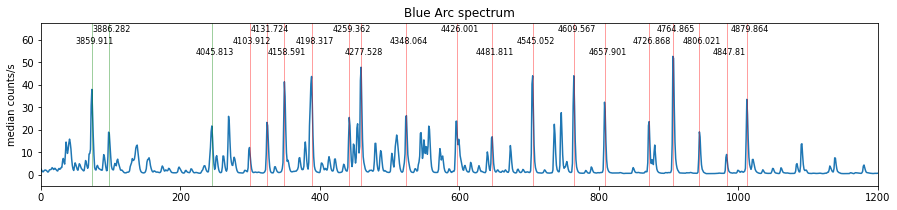

In [71]:
plt.figure(figsize=(15, 3))
plt.plot(arc_1D_spectrum_B)
plt.ylabel('median counts/s')
plt.title('Blue Arc spectrum')
plt.xlim(0, 1200)
plt.ylim(-5, np.max(arc_1D_spectrum_B)+15) # to allow space for annotations


for i, (px, wvl) in enumerate(peaks_wvl_B.items()):
    line_clr = 'green' if wvl[1]=='Fe' else 'red'
    plt.axvline(px, color=line_clr, alpha=0.75, linewidth=0.5, label=wvl[1])
    plt.text(px+4, np.max(arc_1D_spectrum_B)+12-(5*(i%3)), f'{wvl[0]}', fontsize=8, ha='center', va='center')

# plt.legend();

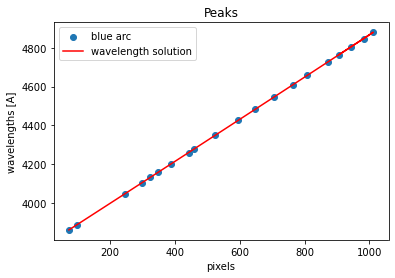

In [72]:
peaks_pixels_B = np.array(list(peaks_wvl_B.keys()))
peaks_wavelengths_B = np.array([wvl for wvl, _ in peaks_wvl_B.values()])

def wvl_solution_B(pixels, deg=2):
    coefficients = np.polyfit(peaks_pixels_B, peaks_wavelengths_B, deg)
    return np.polyval(coefficients, pixels)

plt.scatter(peaks_pixels_B, peaks_wavelengths_B, label='blue arc')
plt.plot(peaks_pixels_B, wvl_solution_B(peaks_pixels_B), color='r', label='wavelength solution')
plt.xlabel('pixels')
plt.ylabel('wavelengths [A]')
plt.title('Peaks')
plt.legend();

### Red

In [73]:
arc_aperture_R = trace_y_idx_R
arc_aperture_R

120

In [74]:
arc_1D_spectrum_R = np.median(rectified_arc_R[trace_y_idx_R - arc_aperture_R : trace_y_idx_R + arc_aperture_R + 1], axis=0)
arc_1D_spectrum_R.shape

(3258,)

array([ 198,  498,  530,  542,  611,  722,  748,  886,  910,  953,  974,
       1091, 1115, 1181, 1259, 1344, 1402, 1547, 1590, 1655, 1752, 1855,
       1918, 2013, 2307, 2372, 2652])

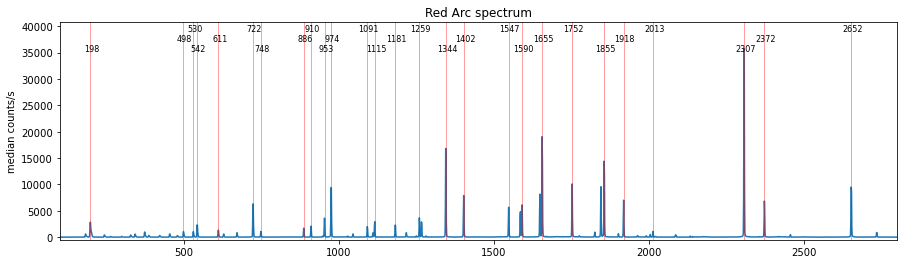

In [75]:
plt.figure(figsize=(15, 4))
plt.plot(arc_1D_spectrum_R)
plt.ylabel('median counts/s')
plt.title('Red Arc spectrum')
plt.xlim(100, 2800)
plt.ylim(-500, np.max(arc_1D_spectrum_R)+5000) # to allow space for annotations

peaks_x_R, _ = find_peaks(arc_1D_spectrum_R, height=1000, distance=12)

for i, px in enumerate(peaks_x_R):
    plt.axvline(px, color='r', alpha=0.75, linewidth=0.5)
    plt.text(px+4, np.max(arc_1D_spectrum_R)+(1900*(i%3)), f'{px}', fontsize=8, ha='center', va='center')
peaks_x_R

In [76]:
# Identified peaks from figure 16b, 18a (https://sites.astro.caltech.edu/palomar/observer/200inchResources/dbsp/dbspArcAtlas.pdf)
# peaks_wvl_R = {
#     3385: (9657.786, 'Ar'),
#     3105: (9224.499, 'Ar'),
#     3040: (9122.967, 'Ar'),
#     2651: (8521.442, 'Ar'),
#     2589: (8424.648, 'Ar'),
#     2485: (8264.522, 'Ar'),
#     2388: (8115.311, 'Ar'),
#     2323: (8014.786, 'Ar'),
#     2280: (7948.176, 'Ar'),
#     2135: (7723.761, 'Ar'),
#     2077: (7635.106, 'Ar'),
#     1992: (7503.869, 'Ar'),
#     1231: (6334.428, 'Ne'),  # much less confident in Ne matches
#     1263: (6382.992, 'Ne'),
#     1276: (6402.246, 'Ne'),
#     1344: (6506.628, 'Ne'),
#     1456: (6678.276, 'Ne'),
#     1481: (6717.043, 'Ne'),
# }

# {key - 733: value for key, value in peaks_wvl_R.items() if key - 733 >= 0}

peaks_wvl_R = {
 2652: (9657.786, 'Ar'),
 2372: (9224.499, 'Ar'),
 2307: (9122.967, 'Ar'),
 1918: (8521.442, 'Ar'),
 1856: (8424.648, 'Ar'),
 1752: (8264.522, 'Ar'),
 1655: (8115.311, 'Ar'),
 1590: (8014.786, 'Ar'),
 1547: (7948.176, 'Ar'),
 1402: (7723.761, 'Ar'),
 1344: (7635.106, 'Ar'),
 1259: (7503.869, 'Ar'),
 498: (6334.428, 'Ne'),
 530: (6382.992, 'Ne'),
 543: (6402.246, 'Ne'),
 611: (6506.628, 'Ne'),
 723: (6678.276, 'Ne'),
 748: (6717.043, 'Ne')
}

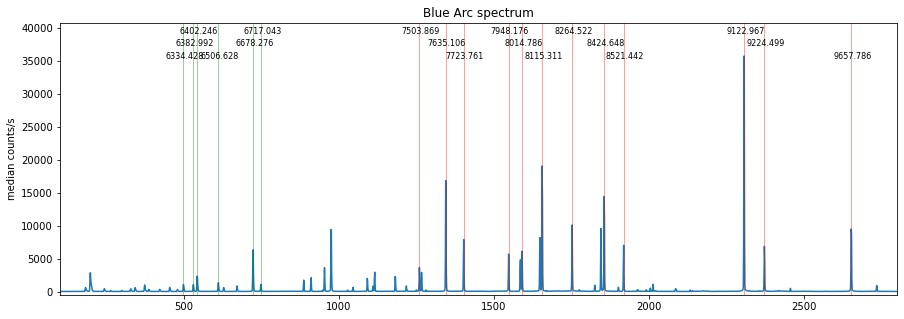

In [77]:
plt.figure(figsize=(15, 5))
plt.plot(arc_1D_spectrum_R)
plt.ylabel('median counts/s')
plt.title('Blue Arc spectrum')
plt.xlim(100, 2800)
plt.ylim(-500, np.max(arc_1D_spectrum_R)+5000) # to allow space for annotations


for i, (px, wvl) in enumerate(peaks_wvl_R.items()):
    line_clr = 'green' if wvl[1]=='Ne' else 'red'
    plt.axvline(px, color=line_clr, alpha=0.75, linewidth=0.5, label=wvl[1])
    plt.text(px+4, np.max(arc_1D_spectrum_R)+(1900*(i%3)), f'{wvl[0]}', fontsize=8, ha='center', va='center')

# plt.legend();

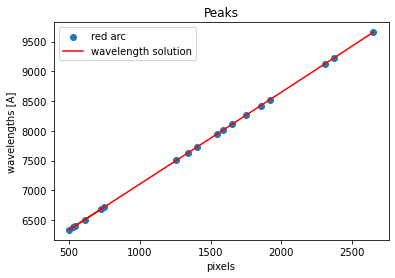

In [78]:
peaks_pixels_R = np.array(list(peaks_wvl_R.keys()))
peaks_wavelengths_R = np.array([wvl for wvl, _ in peaks_wvl_R.values()])

def wvl_solution_R(pixels, deg=2):
    coefficients = np.polyfit(peaks_pixels_R, peaks_wavelengths_R, deg)
    return np.polyval(coefficients, pixels)

plt.scatter(peaks_pixels_R, peaks_wavelengths_R, label='red arc')
plt.plot(peaks_pixels_R, wvl_solution_R(peaks_pixels_R), color='r', label='wavelength solution')
plt.xlabel('pixels')
plt.ylabel('wavelengths [A]')
plt.title('Peaks')
plt.legend();

### Wavelength ranges

In [79]:
rectified_arc_R.shape

(403, 3258)

In [80]:
wvl_range_R = wvl_solution_R(np.arange(0, rectified_arc_R.shape[1]))
wvl_range_R

array([ 5569.95825804,  5571.48940354,  5573.0205569 , ...,
       10595.41257672, 10596.96927582, 10598.52598278])

In [81]:
rectified_arc_B.shape

(292, 1796)

In [82]:
wvl_range_B = wvl_solution_B(np.arange(0, rectified_arc_B.shape[1]))
wvl_range_B

array([3781.36072026, 3782.43738999, 3783.51407786, ..., 5740.963079  ,
       5742.07226383, 5743.18146679])

In [83]:
# where R starts
wvl_range_R[0] 

5569.958258040785

In [84]:
# find index of a number in B that is just smaller than R's start
just_before_R_idx = np.searchsorted(wvl_range_B, wvl_range_R[0])-1 

# right-truncated B wavlengths
end_idx_B = just_before_R_idx + 1 # because np slicing excludes end index
wvl_range_B_trunc = wvl_range_B[: end_idx_B]
wvl_range_B_trunc

array([3781.36072026, 3782.43738999, 3783.51407786, ..., 5567.04598284,
       5568.15232055, 5569.2586764 ])

## Airmass correction 
- use airmass extinction to find zero airmass flux for calib star 

## Flux calibration
- Source and BG extraction on calib star
- Derive counts to photons conversion factor for both red and blue

### source and background extraction

#### Red

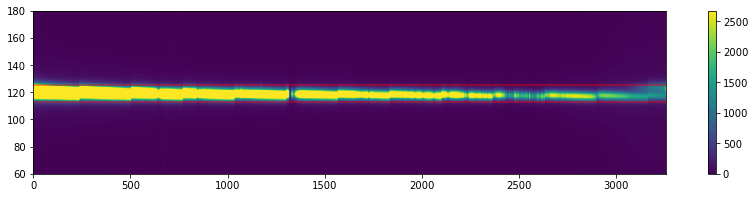

In [85]:
util.plot_frame(reduced_rect_calib_R, prange=(1,99), aspect=7)

aperture_idx_R = (trace_y_idx_R-1 - 6, trace_y_idx_R-1 + 6)
plt.axhline(y=aperture_idx_R[0], color='r', alpha=0.5)
plt.axhline(y=aperture_idx_R[1], color='r', alpha=0.5)
# plt.xlim(1000, 1200)
plt.ylim(trace_y_idx_R - 10 * 6,trace_y_idx_R + 10 * 6 ); 

Text(0.5, 1.0, 'rectified calib star spectrum (RED)')

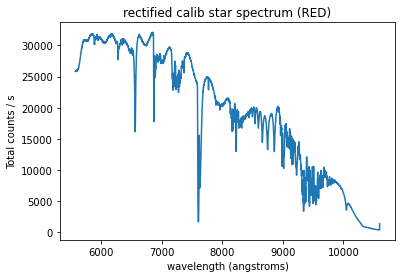

In [86]:
calib_spectrum_R = np.sum(
    rectified_calib_R[aperture_idx_R[0]: aperture_idx_R[1]+1, :],
    axis=0)
plt.plot(wvl_range_R, calib_spectrum_R)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Total counts / s")
plt.title("rectified calib star spectrum (RED)")

Text(0.5, 1.0, 'reduced rectified calib star spectrum (RED)')

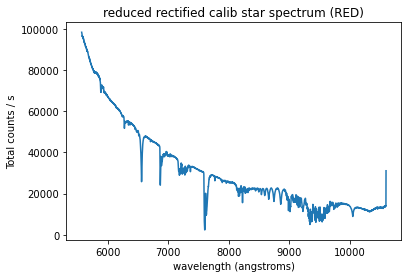

In [87]:
calib_spectrum_R = np.sum(
    reduced_rect_calib_R[aperture_idx_R[0]: aperture_idx_R[1]+1, :],
    axis=0)
plt.plot(wvl_range_R, calib_spectrum_R)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Total counts / s")
plt.title("reduced rectified calib star spectrum (RED)")

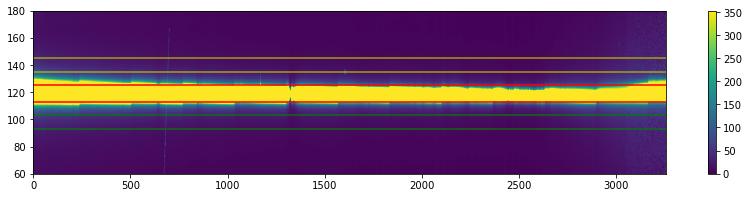

In [88]:
bg_upper_idx_R = (aperture_idx_R[1]+10, aperture_idx_R[1]+20)
bg_lower_idx_R = (aperture_idx_R[0]-20, aperture_idx_R[0]-10)

util.plot_frame(reduced_rect_calib_R, prange=(3,97), aspect=7)
plt.ylim(trace_y_idx_R - 10 * 6,trace_y_idx_R + 10 * 6 )
plt.axhline(y=aperture_idx_R[0], color='r')
plt.axhline(y=aperture_idx_R[1], color='r')

plt.axhline(bg_lower_idx_R[0], color='g', alpha=0.8)
plt.axhline(bg_lower_idx_R[1], color='g', alpha=0.8)
plt.axhline(bg_upper_idx_R[0], color='y', alpha=0.8)
plt.axhline(bg_upper_idx_R[1], color='y', alpha=0.8)

Text(0.5, 1.0, 'Red calib star background signal')

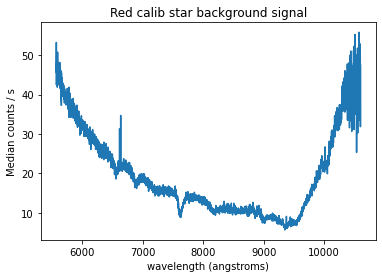

In [89]:
upper_bg_R = reduced_rect_calib_R[bg_upper_idx_R[0]: bg_upper_idx_R[1]+1]
lower_bg_R = reduced_rect_calib_R[bg_lower_idx_R[0]: bg_lower_idx_R[1]+1]

bg_R = np.vstack([upper_bg_R, lower_bg_R])

bg_signal_R = np.median(bg_R, axis=0)
plt.plot(wvl_range_R, bg_signal_R)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Median counts / s")
plt.title("Red calib star background signal")

Text(0.5, 1.0, 'reduced rectified background-subtracted calib star spectrum (RED)')

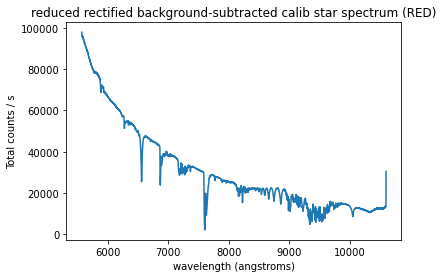

In [90]:
aperture_nrows_R = aperture_idx_R[1]-aperture_idx_R[0]+1 #both are inclusive
summed_bg_R = bg_signal_R * aperture_nrows_R
calib_bg_subtracted_R = calib_spectrum_R - summed_bg_R
plt.plot(wvl_range_R, calib_bg_subtracted_R)

plt.xlabel("wavelength (angstroms)")
plt.ylabel("Total counts / s")
plt.title("reduced rectified background-subtracted calib star spectrum (RED)")

#### Blue

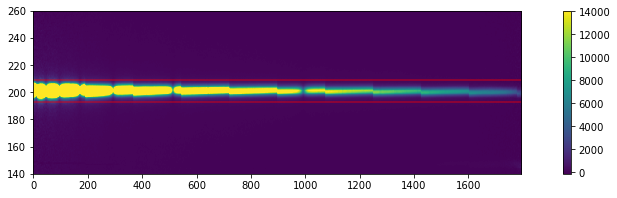

In [91]:
util.plot_frame(reduced_rect_calib_B, prange=(1,99), aspect=5)

aperture_idx_B = (trace_y_idx_B+1 - 8, trace_y_idx_B+1 + 8)
plt.axhline(y=aperture_idx_B[0], color='r', alpha=0.5)
plt.axhline(y=aperture_idx_B[1], color='r', alpha=0.5)
# plt.xlim(1000, 1200)
plt.ylim(trace_y_idx_B - 60, trace_y_idx_B + 60); 

Text(0.5, 1.0, 'rectified calib star spectrum (BLUE)')

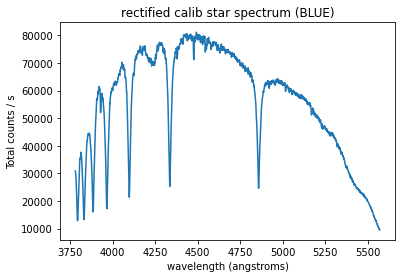

In [92]:
calib_spectrum_B = np.sum(
    rectified_calib_B[aperture_idx_B[0]: aperture_idx_B[1]+1, :end_idx_B], 
    axis=0)
plt.plot(wvl_range_B_trunc, calib_spectrum_B)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Total counts / s")
plt.title("rectified calib star spectrum (BLUE)")

Text(0.5, 1.0, 'reduced rectified calib star spectrum (BLUE)')

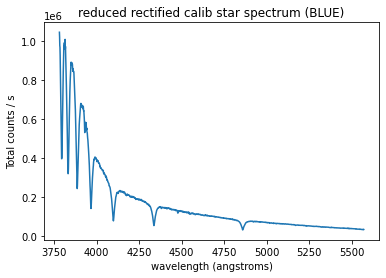

In [93]:
calib_spectrum_B = np.sum(
    reduced_rect_calib_B[aperture_idx_B[0]: aperture_idx_B[1]+1, :end_idx_B], 
    axis=0)
plt.plot(wvl_range_B_trunc, calib_spectrum_B)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Total counts / s")
plt.title("reduced rectified calib star spectrum (BLUE)")

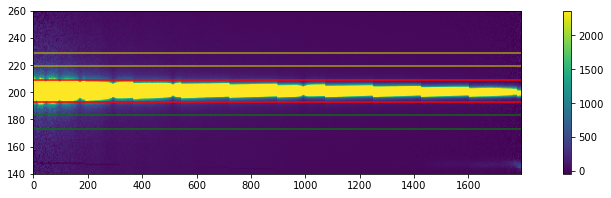

In [94]:
bg_upper_idx_B = (aperture_idx_B[1]+10, aperture_idx_B[1]+20)
bg_lower_idx_B = (aperture_idx_B[0]-20, aperture_idx_B[0]-10)

util.plot_frame(reduced_rect_calib_B, prange=(3,97), aspect=5)
plt.ylim(trace_y_idx_B - 60, trace_y_idx_B + 60)
plt.axhline(y=aperture_idx_B[0], color='r')
plt.axhline(y=aperture_idx_B[1], color='r')

plt.axhline(bg_lower_idx_B[0], color='g', alpha=0.8)
plt.axhline(bg_lower_idx_B[1], color='g', alpha=0.8)
plt.axhline(bg_upper_idx_B[0], color='y', alpha=0.8)
plt.axhline(bg_upper_idx_B[1], color='y', alpha=0.8)

Text(0.5, 1.0, 'median background signal (BLUE)')

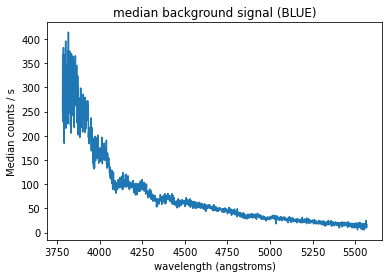

In [95]:
lower_bg_B = reduced_rect_calib_B[bg_lower_idx_B[0] : bg_lower_idx_B[1]+1]
upper_bg_B = reduced_rect_calib_B[bg_upper_idx_B[0] : bg_upper_idx_B[1]+1]

bg_B = np.vstack([upper_bg_B, lower_bg_B])

bg_signal_B = np.median(bg_B[:, :end_idx_B], axis=0)
plt.plot(wvl_range_B_trunc, bg_signal_B)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Median counts / s")
plt.title("median background signal (BLUE)")

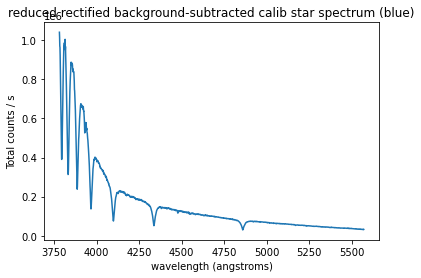

In [96]:
aperture_nrows_B = aperture_idx_B[1]-aperture_idx_B[0]+1 #both are inclusive
summed_bg_B = bg_signal_B * aperture_nrows_B
calib_bg_subtracted_B = calib_spectrum_B - summed_bg_B
plt.plot(wvl_range_B_trunc, calib_bg_subtracted_B)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Total counts / s")
plt.title("reduced rectified background-subtracted calib star spectrum (blue)");

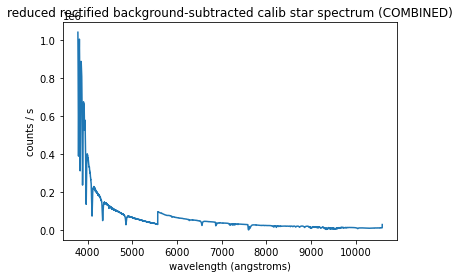

In [97]:
wvl_solution = np.hstack([wvl_range_B_trunc, wvl_range_R])
calib_final = np.hstack([calib_bg_subtracted_B, calib_bg_subtracted_R])
plt.plot(wvl_solution, calib_final)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("counts / s")
plt.title("reduced rectified background-subtracted calib star spectrum (COMBINED)");

### Reference spectrum from pysynphot

In [135]:
# add env variable before importing pysynphot
pysyn_env_location = os.path.join(os.getcwd(), 'grp/redcat/trds/')
os.environ['PYSYN_CDBS'] = pysyn_env_location #note: CDBS not CBDS which is why it was throwing errors

import pysynphot as S

In [136]:
os.environ['PYSYN_CDBS']

'/Users/dennisraush/Desktop/caltech/senior/spring/Ay-Ge 107/ay107_observation/grp/redcat/trds/'

In [137]:
# from https://articles.adsabs.harvard.edu/full/2006MNRAS.368..247C/0000247.000.html: 
# Teff: 9900+-220, log g: 4.00+-0.10, assuming metallicity [M/H] = 0
pysyn_env_location = os.path.join(os.getcwd(), 'grp/redcat/trds/')
os.environ['PYSYN_CDBS'] = pysyn_env_location  #note: CDBS not CBDS which is why it was throwing errors

import pysynphot as S

ref_spec = S.Icat('k93models', 9900, 0, 4.0)
# ref_spec_filename = os.path.join(os.environ['PYSYN_CDBS'], 'grid', 'k93models', 'kp00', 'kp00_10000.fits')
# spec = fits.getdata(ref_spec_filename)
# ref_spec = spec['g40']

In [138]:
# resample ref spectrum to our wavelength grid
ref_spec_resampled = ref_spec.resample(wvl_solution) #TODO: try scipy.signal.resample() over this
ref_spec.wave.shape, ref_spec_resampled.wave.shape

((1221,), (4897,))

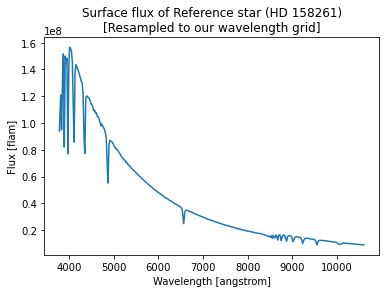

In [139]:
plt.plot(ref_spec_resampled.wave, ref_spec_resampled.flux)
# plt.xlim(wvl_solution[0],wvl_solution[-1])
plt.xlabel(f'Wavelength [{ref_spec_resampled.waveunits}]')
plt.ylabel(f'Flux [{ref_spec_resampled.fluxunits}]')
plt.title('Surface flux of Reference star (HD 158261)\n[Resampled to our wavelength grid]');

In [140]:
# surface flux to absolute flux can be obtained by renormalisation
# as mentioned at 2nd para in https://pysynphot.readthedocs.io/en/latest/appendixa.html#kurucz-atlas


# from https://simbad.cds.unistra.fr/simbad/sim-id?Ident=HD+158261&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id
# V = 5.94 vegamag (default mag system is vega unless specified as per https://simbad.cds.unistra.fr/guide/sim-id.htx)
ref_spec_resampled_abs = ref_spec_resampled.renorm(5.94, 'vegamag', S.ObsBandpass('johnson,v'))

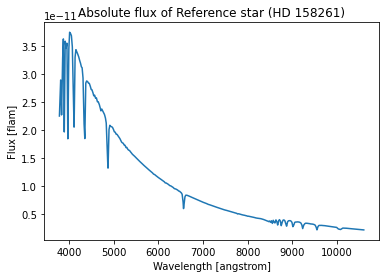

In [141]:
plt.plot(ref_spec_resampled_abs.wave, ref_spec_resampled_abs.flux)
# plt.xlim(wvl_solution[0],wvl_solution[-1])
plt.xlabel(f'Wavelength [{ref_spec_resampled_abs.waveunits}]')
plt.ylabel(f'Flux [{ref_spec_resampled_abs.fluxunits}]')
plt.title('Absolute flux of Reference star (HD 158261)');

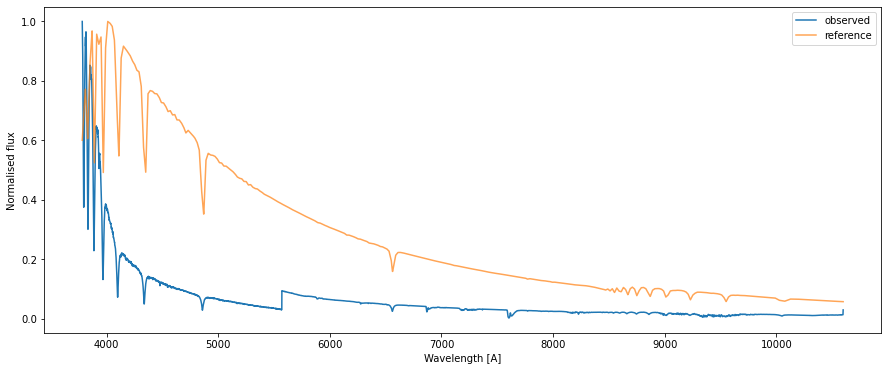

In [142]:
plt.figure(figsize=(15, 6))
plt.plot(wvl_solution, calib_final/np.max(calib_final), label='observed')
plt.plot(ref_spec_resampled_abs.wave, ref_spec_resampled_abs.flux/np.max(ref_spec_resampled_abs.flux), label='reference', alpha=0.7)
plt.legend()
plt.xlabel('Wavelength [A]')
plt.ylabel('Normalised flux');
# plt.xlim(3700, 5000)

In [143]:
ref_spec_resampled_abs.fluxunits # flam = erg s-1 cm-2 A-1

In [144]:
calibration_flux = (ref_spec_resampled_abs.flux * u.Unit('erg s-1 cm-2 AA-1')) / (calib_final * u.Unit('count/s'))
calibration_flux

<Quantity [2.16353352e-17, 2.24667292e-17, 2.37599622e-17, ...,
           1.58187684e-16, 1.57774786e-16, 7.02015414e-17] erg / (Angstrom cm2 ct)>

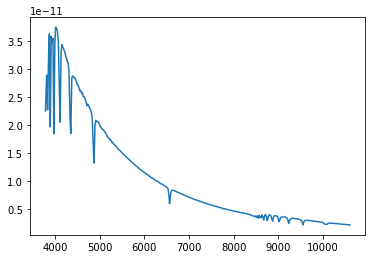

In [145]:
plt.plot(wvl_solution, calibration_flux * calib_final) #sanity check
# plt.xlim(3700, 5000)

### Creating flux calibration

In [146]:
ref_spectrum_filename = os.path.join(pysyn_env_location, 'grid', 'k93models', 'kp00', 'kp00_10000.fits')

# from https://articles.adsabs.harvard.edu/full/2006MNRAS.368..247C/0000247.000.html: Teff: 9900+-220, log g: 4.00+-0.10
# assuming metallicity [M/H] = 0 and T = 10000K hence, kp00_10000
ref_spectrum = fits.getdata(ref_spectrum_filename)
ref_wave_calib = ref_spectrum['WAVELENGTH']
ref_flux_calib = ref_spectrum['g40']  # at log(g) = 4.0

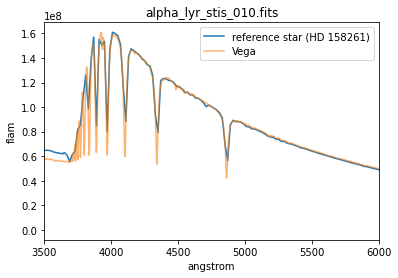

In [147]:
plt.plot(ref_wave_calib, ref_flux_calib, label='reference star (HD 158261)')
plt.xlim(3500, 10000)
plt.xlabel(S.Vega.waveunits)
plt.ylabel(S.Vega.fluxunits)
plt.title(os.path.basename(S.Vega.name))
#plt.plot(S.Vega.wave, S.Vega.flux / np.max(S.Vega.flux))

vega_flux_conversion = np.max(ref_flux_calib) / np.max(S.Vega.flux) # scaling vega to reference star
plt.plot(S.Vega.wave, S.Vega.flux * vega_flux_conversion, alpha=0.6, label='Vega')

plt.xlim(3500, 6000)
plt.legend();

The shapes of the two spectra are identical (just different units) -- I ended up using Vega's spectrum because it behaved better when upsampling. The units of the reference spectrum are ergs/s/cm^2/A and are *surface flux*, meaning we do need to do distance scaling.

In [148]:
import astropy.units as u
from astropy import constants as const
ref_flux = S.Vega.flux * vega_flux_conversion
ref_wave = S.Vega.wave

# convert surface flux to observed flux
d_vega = 25.05 * u.lightyear
r_vega = 164.32 * 10**8 * u.cm
irradiance = ref_flux * u.erg / u.s / u.cm**2 / u.Angstrom

F = irradiance * r_vega.to(u.m)**2 / d_vega.to(u.m) **2
F

<Quantity [1.11244021e-19, 1.50552606e-19, 1.59935499e-19, ...,
           1.18586083e-21, 1.18032586e-21, 1.16718036e-21] erg / (Angstrom cm2 s)>

In [149]:
# converting to photon flux now as in PS3 - we don't need to convert because we aren't gonna integrate peaks to find brightness
freqs = const.c / (ref_wave * u.Angstrom).to(u.m)
E = const.h * freqs # J
photon_flux = F / E
photon_flux = photon_flux.to(1 / u.s / u.Angstrom / u.cm**2)  # photons/s/A/cm^2
photon_flux

<Quantity [5.04266960e-09, 6.83135628e-09, 7.26438544e-09, ...,
           1.78368570e-07, 1.77714019e-07, 1.75910961e-07] 1 / (Angstrom cm2 s)>

Text(0, 0.5, 'Reference star photon flux')

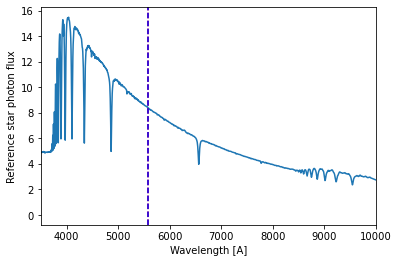

In [150]:
plt.plot(ref_wave, photon_flux)
plt.axvline(np.max(wvl_range_B_trunc), color='r', linestyle='--')
plt.axvline(np.min(wvl_range_R), color='b', linestyle='--')
plt.xlim(3500, 10000)
plt.xlabel("Wavelength [A]")
plt.ylabel("Reference star photon flux")

Text(0, 0.5, 'Resampled reference spectrum (photon/s/A/cm^2)')

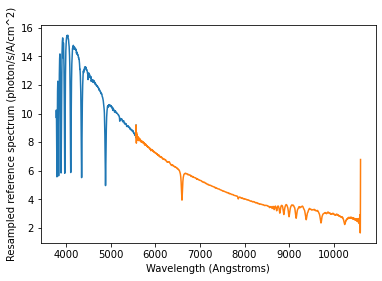

In [151]:
# upsampling reference spectrum
from scipy import signal
ref_flux_B = photon_flux[(ref_wave > np.min(wvl_range_B_trunc)) & (ref_wave < np.max(wvl_range_B_trunc))]
resampled_flux_B = signal.resample(ref_flux_B, wvl_range_B_trunc.shape[0])

ref_flux_R = photon_flux[(ref_wave > np.min(wvl_range_R)) & (ref_wave < np.max(wvl_range_R))]
resampled_flux_R = signal.resample(ref_flux_R, wvl_range_R.shape[0])

# TODO: need to trim edges because of artifacts created by Fourier-window interpolation
plt.plot(wvl_range_B_trunc, resampled_flux_B)
plt.plot(wvl_range_R, resampled_flux_R)
plt.xlabel("Wavelength (Angstroms)")
plt.ylabel("Resampled reference spectrum (photon/s/A/cm^2)")
# plt.xlim(3500, 6000)

Text(0, 0.5, 'Photon Flux [1 / s]')

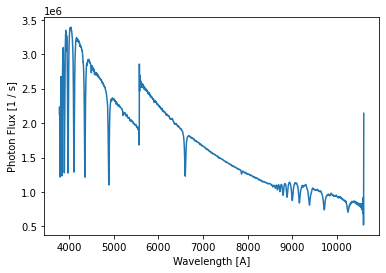

In [152]:
ref_flux_resampled_combined = np.hstack([resampled_flux_B, resampled_flux_R]) / u.s / u.Angstrom / u.cm**2
ref_flux_resampled_combined *= np.gradient(wvl_solution) * u.Angstrom 
palomar_radius = 5.08 / 2 * u.m

ref_flux_resampled_combined *= (palomar_radius.to(u.cm))**2 * np.pi
plt.plot(wvl_solution, ref_flux_resampled_combined)
plt.xlabel(f'Wavelength [A]')
plt.ylabel(f'Photon Flux [{ref_flux_resampled_combined.unit}]')


## Process Science data
- All above steps on science data to extract spectrum from images

### Rectify, reduce, airmass-correct frames

In [153]:
science = hdr_df[(hdr_df['IMGTYPE']=='object') & (hdr_df['OBJECT'] != 'HD 158261')]
science

OBJECT IMGTYPE  GAIN  EXPTIME          UT           RA  \
filename                                                              
red0022        none  object  2.80    600.0  03:49:20.9  16:59:05.87   
red0023   SN2024eze  object  2.80    600.0  04:01:01.1  16:59:05.80   
red0024   SN2024eze  object  2.80    600.0  04:11:24.3  16:59:05.90   
red0025   SN2024eze  object  2.80    600.0  04:21:47.4  16:59:05.93   
blue0022  SN2024eze  object  0.72   1200.0  03:50:23.6  16:59:05.82   
blue0023  SN2024eze  object  0.72   1200.0  04:10:54.6  16:59:05.86   

                  DEC AIRMASS   GRATING  
filename                                 
red0022   +42:52:25.9   2.817  316/7500  
red0023   +42:52:26.6   2.590  316/7500  
red0024   +42:52:26.3   2.417  316/7500  
red0025   +42:52:26.6   2.266  316/7500  
blue0022  +42:52:26.2   2.795  600/4000  
blue0023  +42:52:26.6   2.425  600/4000

In [155]:
# TODO: if applying airmass correction, then replace create_master with following function 
# that does median stacking after applying rectification, reduction, correction to each individual frame
def master_science_frame(color):
    # TODO: split red and blue

    science_wvl, extinction_wvl, extinction = None #TODO: add np arrays when available
    science_frames = []
    for fname in science.index:
        frame = util.rectify_frame(data[fname], trace_y_R, y_bound_upper_R, y_bound_lower_R)
        frame = util.reduce_frame(frame, science.loc[fname, 'EXPTIME'], normalised_flat_R, master_bias_red)
        frame = util.correct_airmass(science_wvl, frame, extinction_wvl, extinction, science.loc[fname, 'AIRMASS'])
        science_frames.append(frame)

    return np.median(np.array(science_frames), axis=0)

In [156]:
science_master_red = create_master(science, 'red', master_bias_red)
science_master_blue = create_master(science, 'blue', master_bias_blue)
science_master_red.shape, science_master_blue.shape

((440, 4141), (2835, 460))

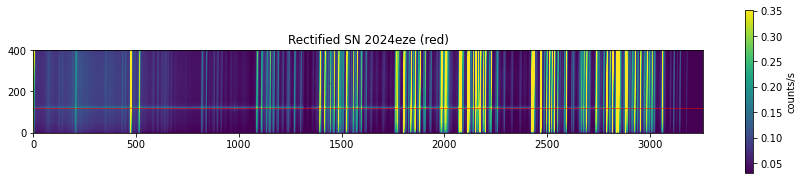

In [157]:
# apply step #1-2 from "Rectify red" section
science_red_rectified = util.rectify_frame(
    science_master_red, trace_y_R, y_bound_upper_R, y_bound_lower_R
    )[:, x_trim_mask_R]

util.plot_frame2(science_red_rectified, label='counts/s', title='Rectified SN 2024eze (red)', prange=prange_R)
plt.axhline(trace_y_idx_R, color='r', linewidth=0.5)

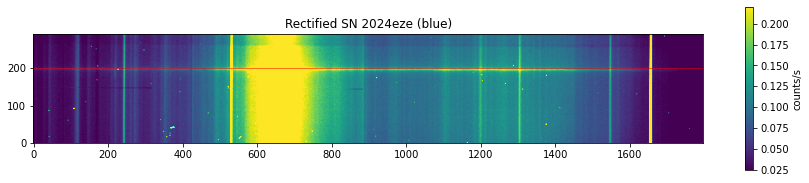

In [158]:
# apply step #1-4 from "Rectify blue" section
science_blue_rectified = util.rectify_frame(
    science_master_blue.T, trace_y_B, y_bound_upper_B, y_bound_lower_B
    )[:, x_trim_mask_B][:,::-1]

util.plot_frame2(science_blue_rectified, label='counts/s', title='Rectified SN 2024eze (blue)', prange=prange_R)
plt.axhline(trace_y_idx_B, color='r', linewidth=0.5)

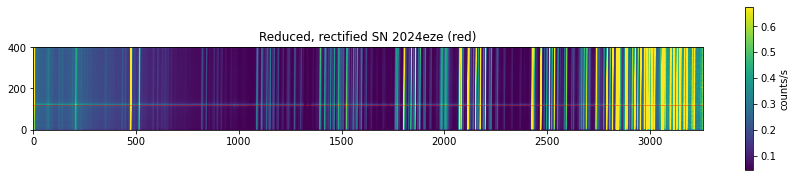

In [159]:
reduced_rect_science_R = science_red_rectified / normalised_flat_R

util.plot_frame2(reduced_rect_science_R, label='counts/s', title='Reduced, rectified SN 2024eze (red)', prange=prange_R)
plt.axhline(trace_y_idx_R, color='r', linewidth=0.5, alpha=0.7)

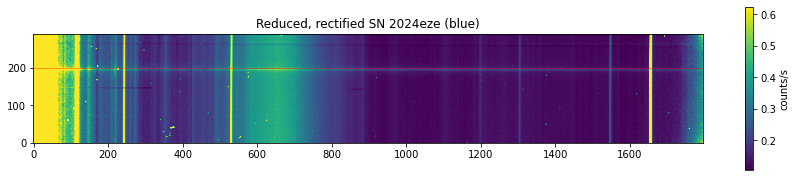

In [160]:
reduced_rect_science_B = science_blue_rectified / normalised_flat_B

util.plot_frame2(reduced_rect_science_B, label='counts/s', title='Reduced, rectified SN 2024eze (blue)', prange=prange_B)
plt.axhline(trace_y_idx_B, color='r', linewidth=0.5, alpha=0.7)

### Extract source and background
#### Red

(50.0, 200.0)

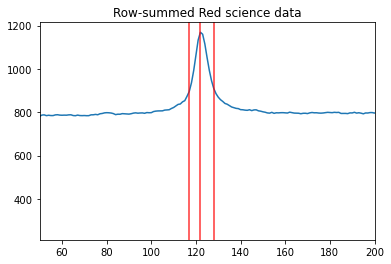

In [161]:
sci_aperture_idx_R = (trace_y_idx_R+2-5, trace_y_idx_R+2+6)

plt.plot(np.sum(reduced_rect_science_R, axis=1))
plt.title('Row-summed Red science data')

plt.axvline(trace_y_idx_R+2, color='r', alpha=0.8)
plt.axvline(sci_aperture_idx_R[0], color='r', alpha=0.8)
plt.axvline(sci_aperture_idx_R[1], color='r', alpha=0.8)
plt.xlim(50, 200)

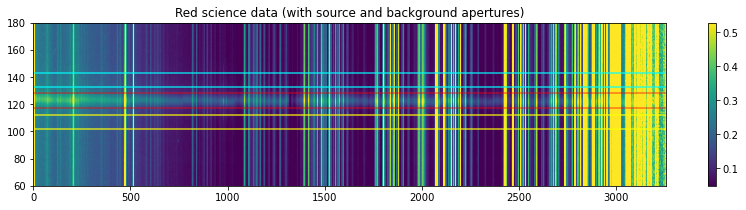

In [162]:
util.plot_frame(reduced_rect_science_R, prange=(10, 90), aspect=7)
plt.title('Red science data (with source and background apertures)')

plt.axhline(y=sci_aperture_idx_R[0], color='r', alpha=0.5)
plt.axhline(y=sci_aperture_idx_R[1], color='r', alpha=0.5)


sci_bg_upper_idx_R = (sci_aperture_idx_R[1]+5, sci_aperture_idx_R[1]+15)
sci_bg_lower_idx_R = (sci_aperture_idx_R[0]-15, sci_aperture_idx_R[0]-5)
plt.axhline(sci_bg_upper_idx_R[0], color='cyan', alpha=0.8)
plt.axhline(sci_bg_upper_idx_R[1], color='cyan', alpha=0.8)
plt.axhline(sci_bg_lower_idx_R[0], color='yellow', alpha=0.8)
plt.axhline(sci_bg_lower_idx_R[1], color='yellow', alpha=0.8)

plt.ylim(trace_y_idx_R - 60,trace_y_idx_R + 60); 

Text(0.5, 1.0, 'SN 2024eze spectrum w/ Background (RED)')

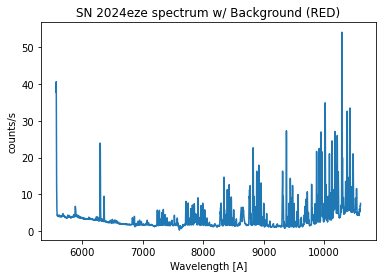

In [163]:
sci_source_spec_R = np.sum(reduced_rect_science_R[sci_aperture_idx_R[0] : sci_aperture_idx_R[1]+1], axis=0)

plt.plot(wvl_range_R, sci_source_spec_R)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze spectrum w/ Background (RED)')

Text(0.5, 1.0, 'SN 2024eze background (RED)')

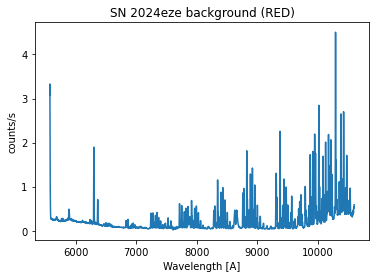

In [164]:
sci_bg_spec_R = np.median(np.concatenate((
    reduced_rect_science_R[sci_bg_lower_idx_R[0]: sci_bg_lower_idx_R[1]+1],
    reduced_rect_science_R[sci_bg_upper_idx_R[0]: sci_bg_upper_idx_R[1]+1]),
    axis=0), axis=0)

plt.plot(wvl_range_R, sci_bg_spec_R)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze background (RED)')

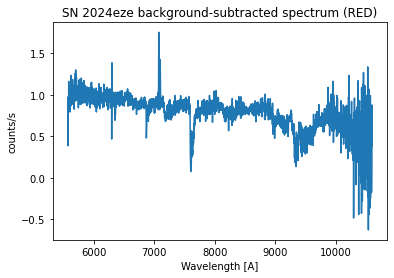

In [165]:
sci_aperture_nrows_R = sci_aperture_idx_R[1] - sci_aperture_idx_R[0]+1
science_spectrum_R = sci_source_spec_R - (sci_bg_spec_R * sci_aperture_nrows_R)

plt.plot(wvl_range_R, science_spectrum_R)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze background-subtracted spectrum (RED)');

#### Blue

(150.0, 250.0)

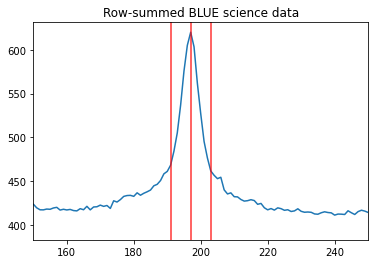

In [166]:
sci_aperture_idx_B = (trace_y_idx_B-3-6, trace_y_idx_B-3+6)

plt.plot(np.sum(reduced_rect_science_B, axis=1))
plt.title('Row-summed BLUE science data')

plt.axvline(trace_y_idx_B-3, color='r', alpha=0.8)
plt.axvline(sci_aperture_idx_B[0], color='r', alpha=0.8)
plt.axvline(sci_aperture_idx_B[1], color='r', alpha=0.8)
plt.xlim(150, 250)

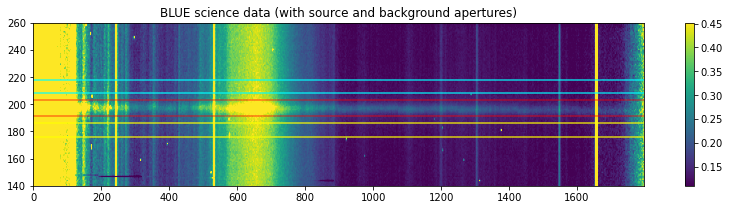

In [167]:
util.plot_frame(reduced_rect_science_B, prange=(8, 92), aspect=4)
plt.title('BLUE science data (with source and background apertures)')

plt.axhline(y=sci_aperture_idx_B[0], color='r', alpha=0.5)
plt.axhline(y=sci_aperture_idx_B[1], color='r', alpha=0.5)


sci_bg_upper_idx_B = (sci_aperture_idx_B[1]+5, sci_aperture_idx_B[1]+15)
sci_bg_lower_idx_B = (sci_aperture_idx_B[0]-15, sci_aperture_idx_B[0]-5)
plt.axhline(sci_bg_upper_idx_B[0], color='cyan', alpha=0.8)
plt.axhline(sci_bg_upper_idx_B[1], color='cyan', alpha=0.8)
plt.axhline(sci_bg_lower_idx_B[0], color='yellow', alpha=0.8)
plt.axhline(sci_bg_lower_idx_B[1], color='yellow', alpha=0.8)

plt.ylim(trace_y_idx_B - 60,trace_y_idx_B + 60); 

Text(0.5, 1.0, 'SN 2024eze spectrum w/ Background (BLUE)')

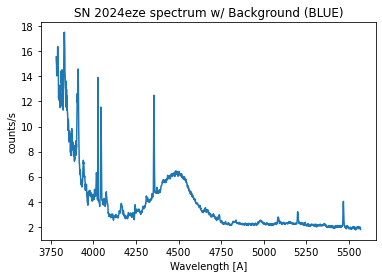

In [168]:
sci_source_spec_B = np.sum(
    reduced_rect_science_B[sci_aperture_idx_B[0] : sci_aperture_idx_B[1]+1, :end_idx_B], 
    axis=0)

plt.plot(wvl_range_B_trunc, sci_source_spec_B)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze spectrum w/ Background (BLUE)')

Text(0.5, 1.0, 'SN 2024eze background (BLUE)')

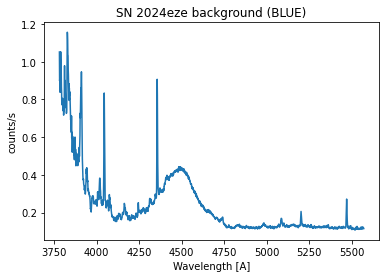

In [169]:
sci_bg_spec_B = np.median(np.concatenate((
    reduced_rect_science_B[sci_bg_lower_idx_B[0]: sci_bg_lower_idx_B[1]+1],
    reduced_rect_science_B[sci_bg_upper_idx_B[0]: sci_bg_upper_idx_B[1]+1]),
    axis=0)[:, :end_idx_B], axis=0)

plt.plot(wvl_range_B_trunc, sci_bg_spec_B)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze background (BLUE)')

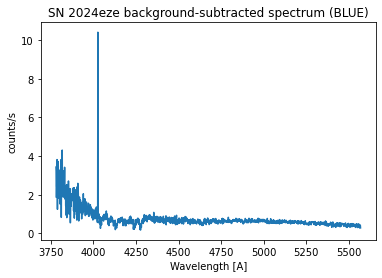

In [170]:
sci_aperture_nrows_B = sci_aperture_idx_B[1] - sci_aperture_idx_B[0]+1
science_spectrum_B = sci_source_spec_B - (sci_bg_spec_B * sci_aperture_nrows_B)

plt.plot(wvl_range_B_trunc, science_spectrum_B)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze background-subtracted spectrum (BLUE)');

### Calibrate combined spectrum

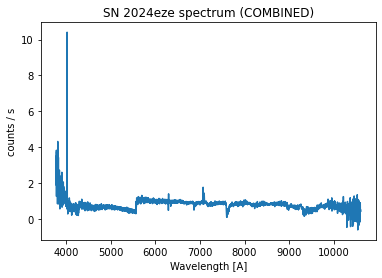

In [171]:
science_spectrum_combined = np.hstack([science_spectrum_B, science_spectrum_R]) * u.Unit('count/s')
plt.plot(wvl_solution, science_spectrum_combined)
plt.xlabel("Wavelength [A]")
plt.ylabel("counts / s")
plt.title("SN 2024eze spectrum (COMBINED)");

In [172]:
science_spectrum_calibrated = science_spectrum_combined * calibration_flux
science_spectrum_calibrated

<Quantity [4.08500154e-17, 7.78245078e-17, 7.63794399e-17, ...,
           5.96297890e-17, 8.17389150e-17, 3.00239529e-17] erg / (Angstrom cm2 s)>

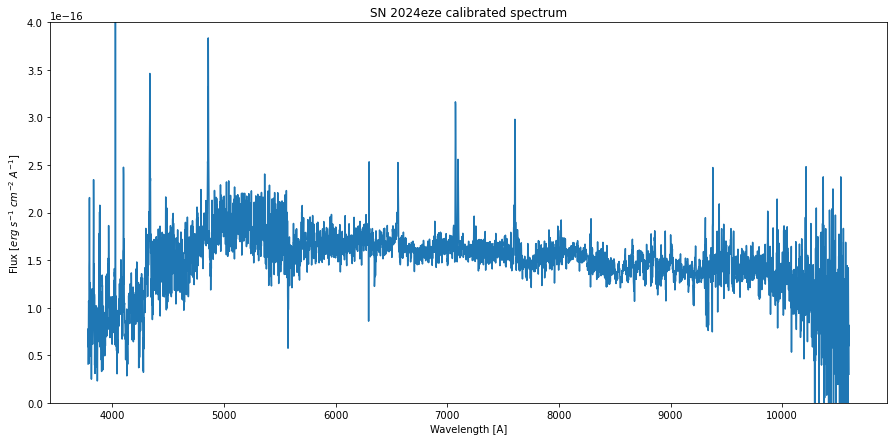

In [173]:
plt.figure(figsize=(15, 7))
plt.plot(wvl_solution, science_spectrum_calibrated)

plt.ylim(0, 0.4e-15)
plt.xlabel("Wavelength [A]")
plt.ylabel("Flux [$erg\ s^{-1}\ cm^{-2}\ A^{-1}$]")
plt.title("SN 2024eze calibrated spectrum");

## Data Analysis

In [174]:
tns_data = pd.read_csv('tns_2024eze_2024-04-12_11-13-24_P200_DBSP_ZTF.ascii',
                        sep='\t',
                        na_values=['None'],
                        names=['wavelength', 'flux'],
                        dtype={'wavelength': 'float64', 'flux': 'float64'})
tns_data

wavelength     flux
0         3400.2  11.7570
1         3401.2  14.5570
2         3402.3  13.6740
3         3403.4  12.9680
4         3404.4   8.0631
...          ...      ...
5225     10492.0  -1.9583
5226     10494.0  25.2250
5227     10495.0  37.1320
5228     10497.0   2.4639
5229     10498.0  19.9950

[5230 rows x 2 columns]

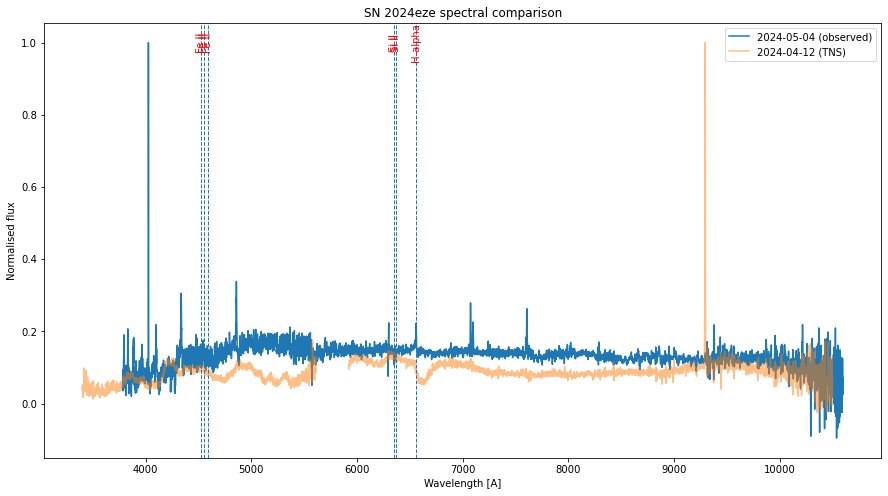

In [202]:
plt.figure(figsize=(15, 8))
plt.plot(wvl_solution, science_spectrum_calibrated/np.max(science_spectrum_calibrated), 
         label='2024-05-04 (observed)')
plt.plot(tns_data.wavelength, tns_data.flux/np.max(tns_data.flux), 
         label='2024-04-12 (TNS)', alpha=0.5)

# plt.ylim(0, 0.4e-15)
plt.xlabel("Wavelength [A]")
plt.ylabel("Normalised flux")
plt.title("SN 2024eze spectral comparison")
lines = {4523: "Fe II", 4550: "Fe II", 4594: "Fe II", 6347: "Si II", 6371: "Si II", 6560: "H-alpha"}
plt.legend();

for line in lines.keys():
    plt.axvline(x=line, label=lines[line], linestyle='--', linewidth=1)
    plt.text(line, 1, lines[line], ha='center', va='center',rotation='vertical',color='red')

(4000.0, 7000.0)

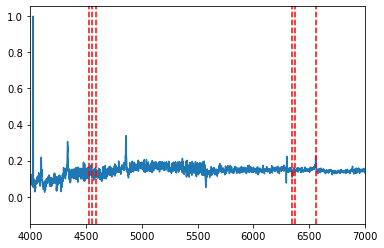

In [194]:
lines = {4523: "Fe II", 4550: "Fe II", 4594: "Fe II", 6347: "Si II", 6371: "Si II", 6560: "H-alpha"}
plt.plot(wvl_solution, science_spectrum_calibrated/np.max(science_spectrum_calibrated), 
         label='2024-05-04 (observed)')

for line in lines.keys():
    plt.axvline(x=line, label=lines[line], color='r', linestyle='--')
    
plt.xlim(4000, 7000)

In [185]:
list(lines.keys())

[4523, 4550, 4594, 6347, 6371, 6560]